In [1]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn import ensemble
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import pickle
import pandas as pd

In [2]:
df = pd.read_csv("shuffled_data.csv")

tweets = list(df["tweet"])
labels = list(df["class"])

df.head()

,tweet,class
0,i heartily appreciate a director who has made ...,1
1,i know i know😒,0
2,i'm very proud to be talking about the emotion...,1
3,choosing to ignore & not speak on things that ...,0
4,waiting for the day loona does a soshi cover s...,0


In [3]:
def process_text(texts):
    new_texts = []
    for text in texts:
        text = text.lower()
        # special characters
        text = re.sub(r'\W', ' ', text)
        # single characters
        text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
        # substitute multiple spaces with single one
        text = re.sub(r'\s+', ' ', text)
        # single characters from the start
        text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
        # lemmatization
        text = text.split(' ')
        text = [stemmer.lemmatize(word) for word in text]
        new_texts.append(' '.join(text))
    return new_texts

In [4]:
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()
tweets_processed = process_text(tweets)

In [5]:
print(tweets_processed[0], '\n', tweets[0])

i heartily appreciate director who ha made or want to make film about mental health and severity of clinical depression bipolar adhd ocd etc generally people assume reason for these is just lack of will power  
 i heartily appreciate a director who has made or wants to make a film about mental health and severity of clinical depression,bipolar,adhd,ocd,etc. generally people assume reason for these is just lack of will power.


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words=stopwords.words('english'))
X = vect.fit_transform(tweets_processed).toarray()

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer

tfd = TfidfTransformer()
X = tfd.fit_transform(X).toarray()

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=0)

In [9]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn import ensemble

models = [
          KNeighborsRegressor(),
          linear_model.Lasso(),
          linear_model.Ridge(),
          linear_model.ElasticNet(),
          ensemble.GradientBoostingRegressor(),
          ensemble.RandomForestRegressor(),
          ensemble.ExtraTreesRegressor()
]

models_names = ['K-nn','Lasso','Ridge','Elastic','Boost','Forest','Extra']

In [11]:
from sklearn import metrics
scores, mse, mae = [], [], []

for model in models:
    fits = model.fit(x_train, y_train)
    scores.append(metrics.r2_score(y_test, fits.predict(x_test)))
    mse.append(metrics.mean_squared_error(y_test, fits.predict(x_test)))    
    mae.append(metrics.mean_absolute_error(y_test, fits.predict(x_test)))

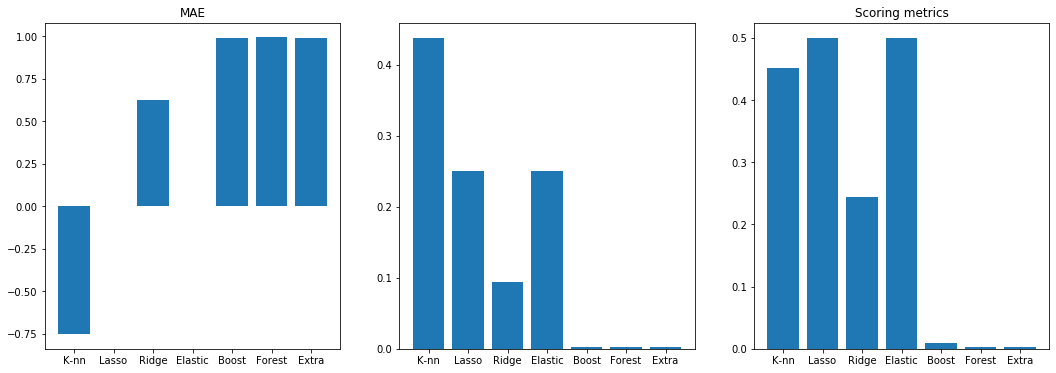

In [12]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 6))
plt.title("Scoring metrics")
ax1.set_title("R^2")
ax1.bar(models_names, scores)
ax1.set_title("MSE")
ax2.bar(models_names, mse)
ax1.set_title("MAE")
ax3.bar(models_names, mae)
plt.show()

In [13]:
df_scores = pd.DataFrame(zip(models_names, mse, mae, scores), columns=["model", "mse", "mae", "score"])
df_scores.score = round(df_scores.score * 100, 2)
df_scores.mse = round(df_scores.mse, 1)
df_scores.mae = round(df_scores.mae, 2)
df_scores

,model,mse,mae,score
0,K-nn,0.4,0.45,-75.05
1,Lasso,0.2,0.50,-0.02
2,Ridge,0.1,0.24,62.26
3,Elastic,0.2,0.50,-0.02
4,Boost,0.0,0.01,99.17
5,Forest,0.0,0.00,99.19
6,Extra,0.0,0.00,99.15


In [14]:
model = ensemble.RandomForestRegressor().fit(x_train, y_train)
y_pred = model.predict(x_test)

In [16]:
import seaborn as sns

In [24]:
y_test = np.array(y_test).astype(int)
y_pred = np.array(y_pred).astype(int)
y_test

array([0, 1, 0, ..., 1, 0, 0])

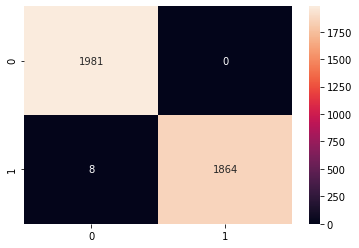

In [28]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [31]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1981
           1       1.00      1.00      1.00      1872

    accuracy                           1.00      3853
   macro avg       1.00      1.00      1.00      3853
weighted avg       1.00      1.00      1.00      3853



In [30]:
with open('random_forest', 'wb') as f:
    pickle.dump(model, f)